In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import sys
import os

# Add the src directory to the sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from eda import load_datasets
# Load datasets
benin_df, sierra_df, togo_df = load_datasets()

In [3]:
from eda import summary_statistics
print("\n")
print(f"Statistics summary for dataset in Benign:\n {summary_statistics(benin_df)}")
print("\n")
print("\n")
print(f"Statistics summary for dataset in Sier Liyon:\n {summary_statistics(sierra_df)}")
print("\n")
print("\n")
print(f"Statistics summary for dataset in Togo:\n {summary_statistics(togo_df)}")



Statistics summary for dataset in Benign:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       

In [4]:
from eda import check_data_quality

quality_report = check_data_quality(benin_df)
print(f"Data quality for Benin: {quality_report['summary']}")

Data quality for Benin: {'total_missing': 0, 'total_negative': 794016, 'total_outliers': 12423}


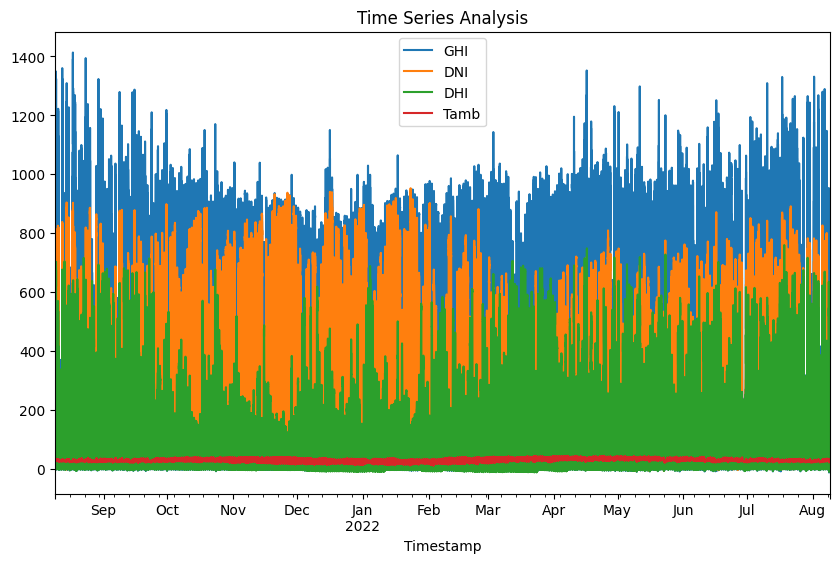

In [5]:
from eda import plot_time_series
plot_time_series(benin_df, "Timestamp", ['GHI', 'DNI', 'DHI', 'Tamb'], title="Time Series Analysis")

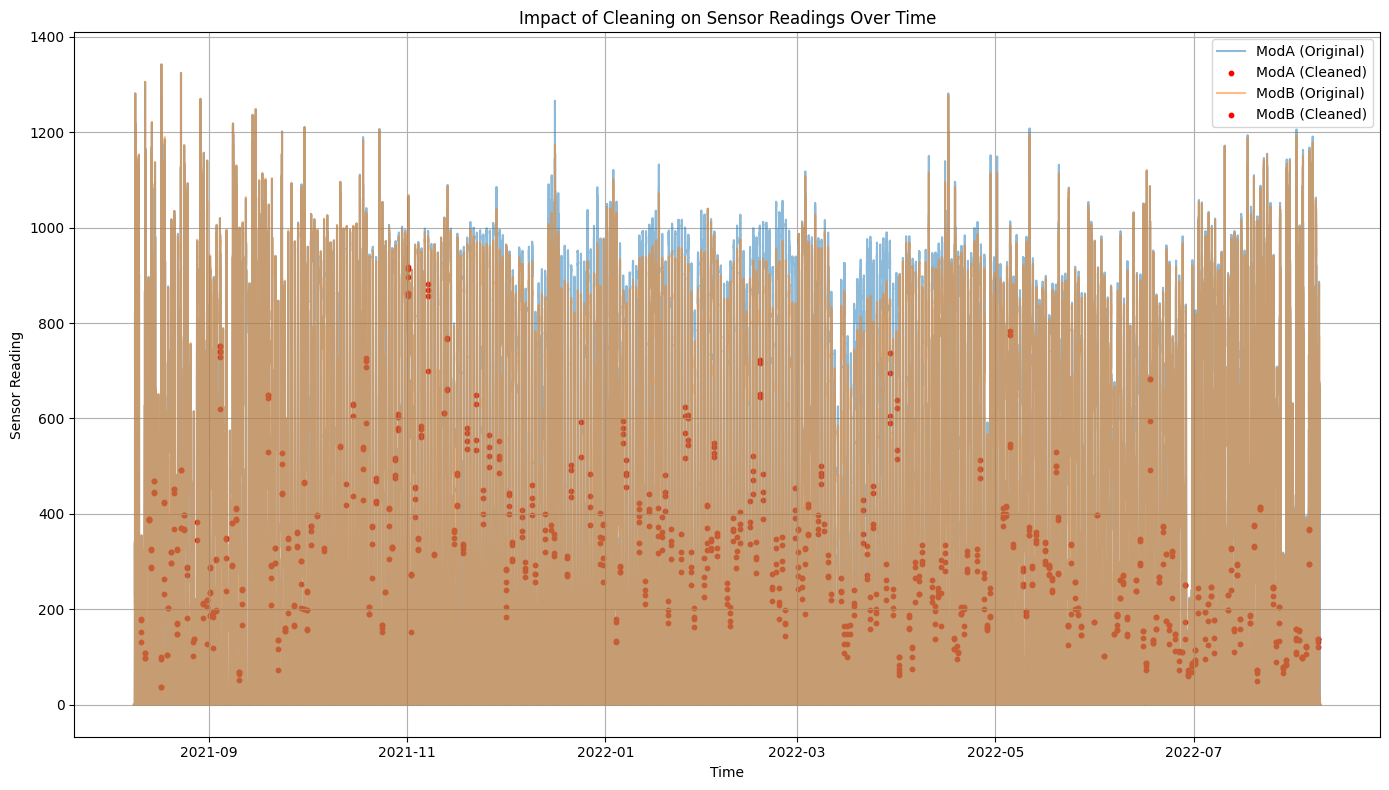

Uncleaned Data Summary:
                ModA           ModB
count  525115.000000  525115.000000
mean      236.524253     228.816071
std       327.002662     316.640506
min         0.000000       0.000000
25%         0.000000       0.000000
50%         4.300000       4.200000
75%       463.900000     448.100000
max      1342.300000    1342.300000

Cleaned Data Summary:
             ModA        ModB
count  485.000000  485.000000
mean   307.229278  301.972165
std    159.987048  153.643905
min     37.100000   37.300000
25%    187.800000  186.100000
50%    291.700000  283.200000
75%    393.900000  375.200000
max    914.000000  917.000000


In [6]:
from eda import evaluate_cleaning_impact

# Evaluate cleaning impact on the Benin dataset
cleaning_impact_summary = evaluate_cleaning_impact(benin_df, sensor_columns=['ModA', 'ModB'], cleaning_column='Cleaning', time_column='Timestamp')

# Display summary statistics
print("Uncleaned Data Summary:")
print(cleaning_impact_summary['uncleaned'])
print("\nCleaned Data Summary:")
print(cleaning_impact_summary['cleaned'])


             GHI       DNI       DHI     TModA     TModB        WS    WSgust  \
GHI     1.000000  0.882376  0.849989  0.920127  0.874338  0.457349  0.484144   
DNI     0.882376  1.000000  0.546602  0.790340  0.756007  0.397099  0.419469   
DHI     0.849989  0.546602  1.000000  0.825012  0.777829  0.426959  0.450904   
TModA   0.920127  0.790340  0.825012  1.000000  0.983443  0.429899  0.458782   
TModB   0.874338  0.756007  0.777829  0.983443  1.000000  0.400509  0.430020   
WS      0.457349  0.397099  0.426959  0.429899  0.400509  1.000000  0.984599   
WSgust  0.484144  0.419469  0.450904  0.458782  0.430020  0.984599  1.000000   
WD      0.079664  0.018839  0.102752  0.164692  0.205442  0.238566  0.257456   

              WD  
GHI     0.079664  
DNI     0.018839  
DHI     0.102752  
TModA   0.164692  
TModB   0.205442  
WS      0.238566  
WSgust  0.257456  
WD      1.000000  


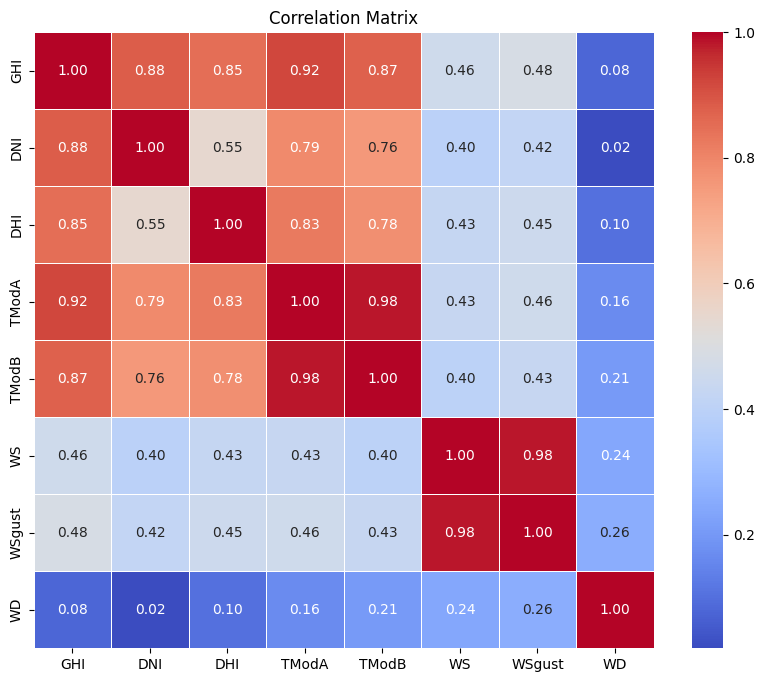

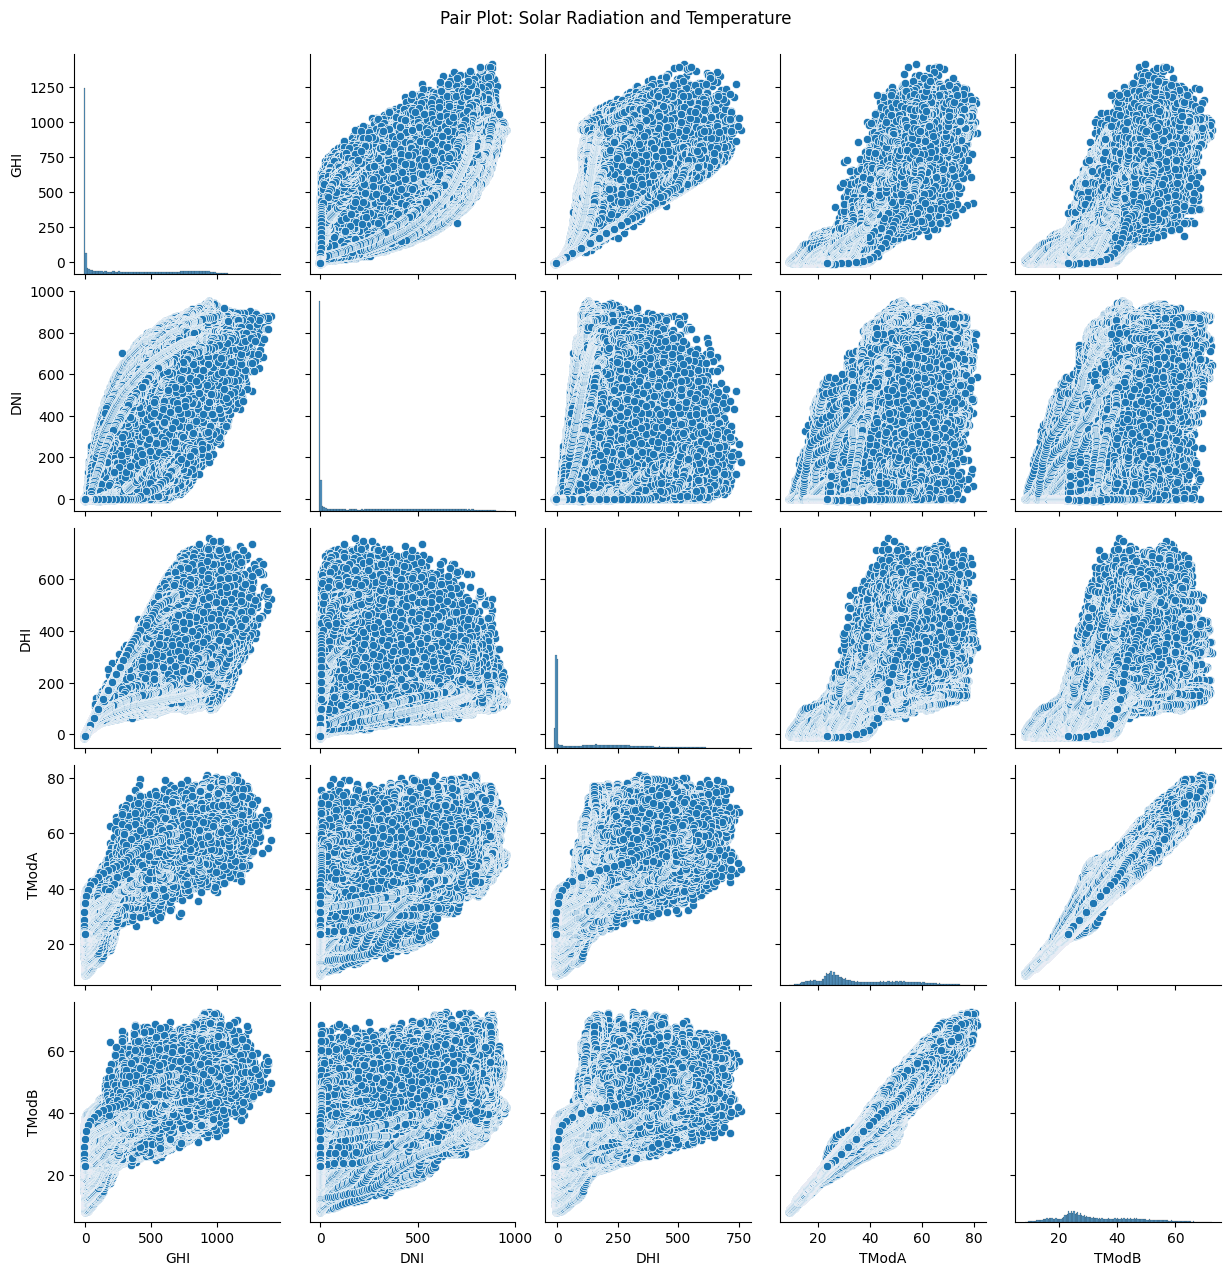

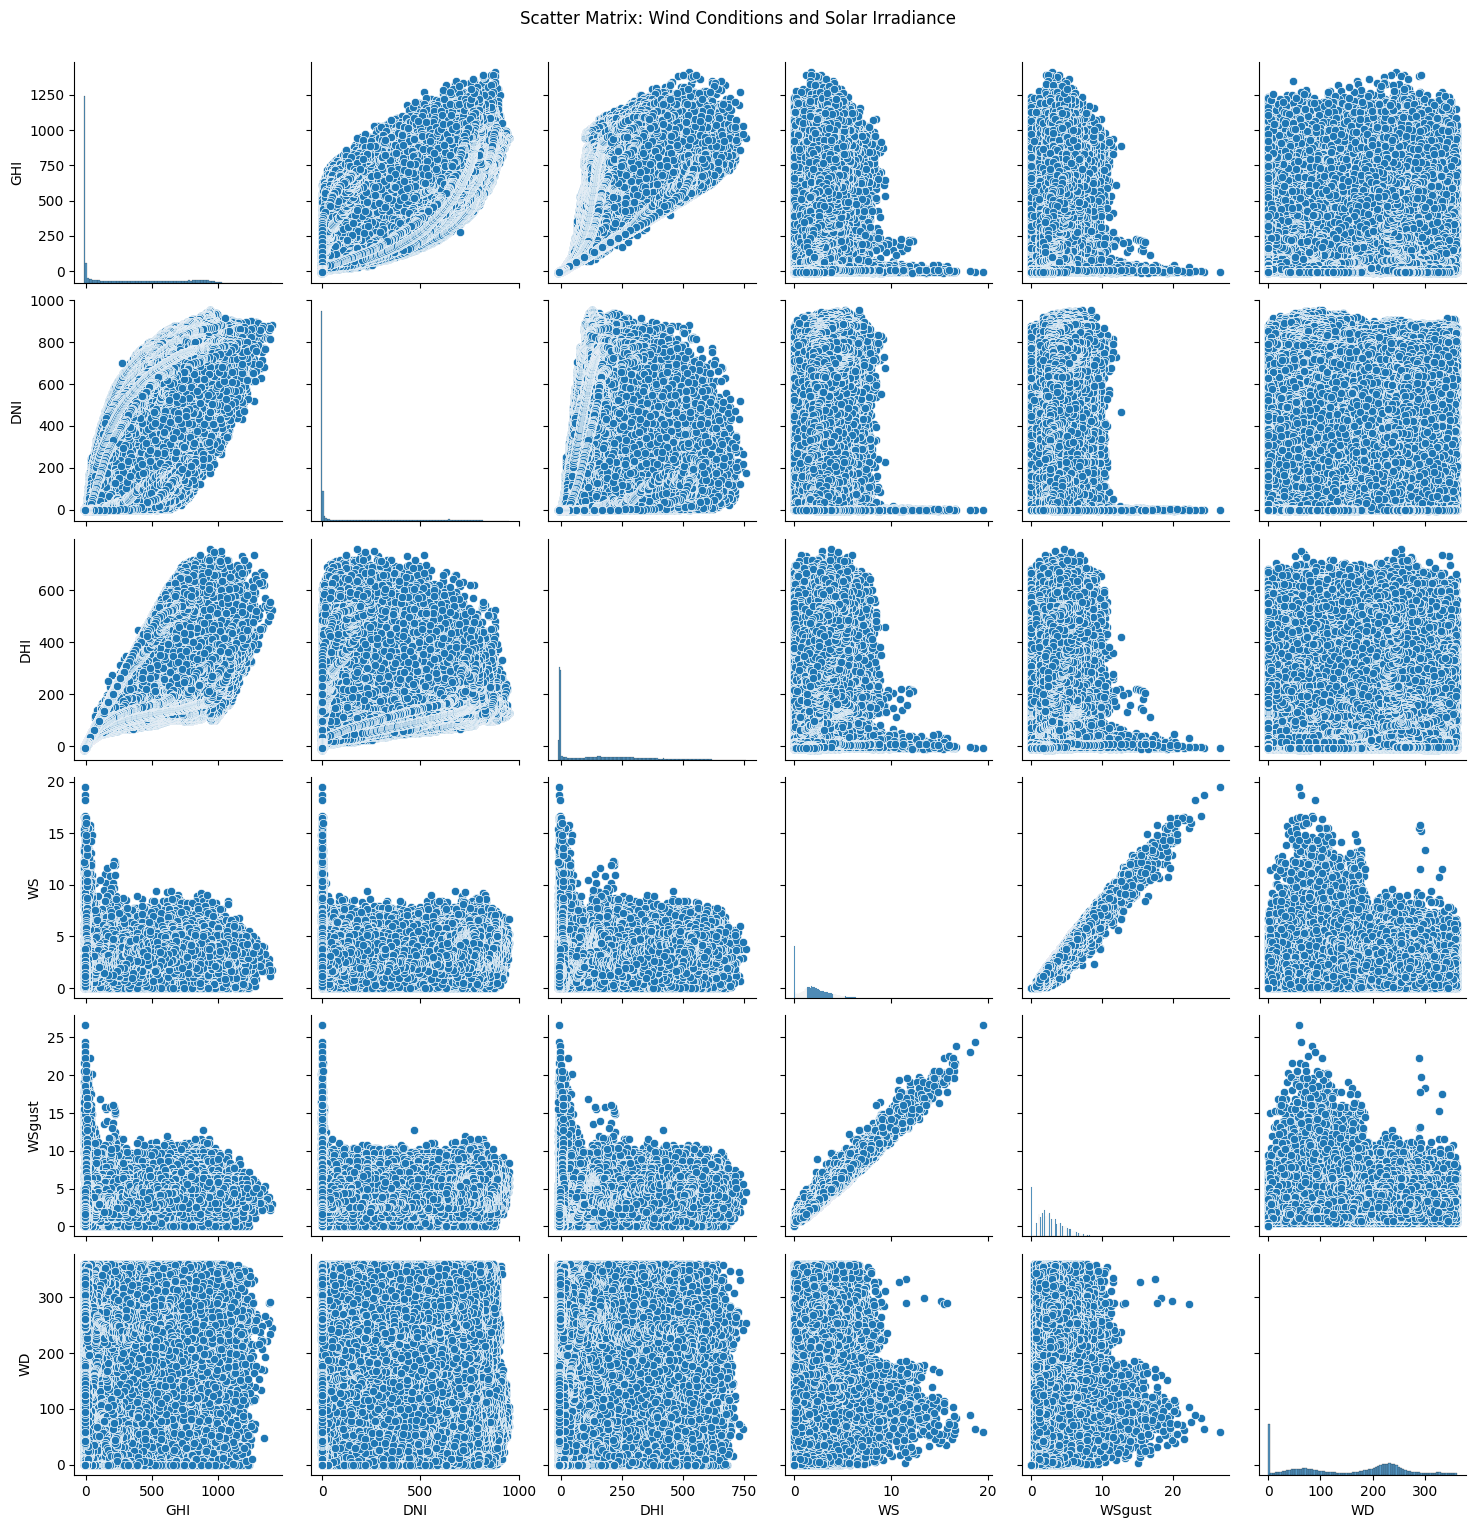

In [7]:
from eda import visualize_correlations

output_dir = 'plots_visualize correlations'  
os.makedirs(output_dir, exist_ok=True)

correlation_matrix = visualize_correlations(benin_df, output_dir=output_dir)

# Display the correlation matrix
print(correlation_matrix)

<Figure size 800x800 with 0 Axes>

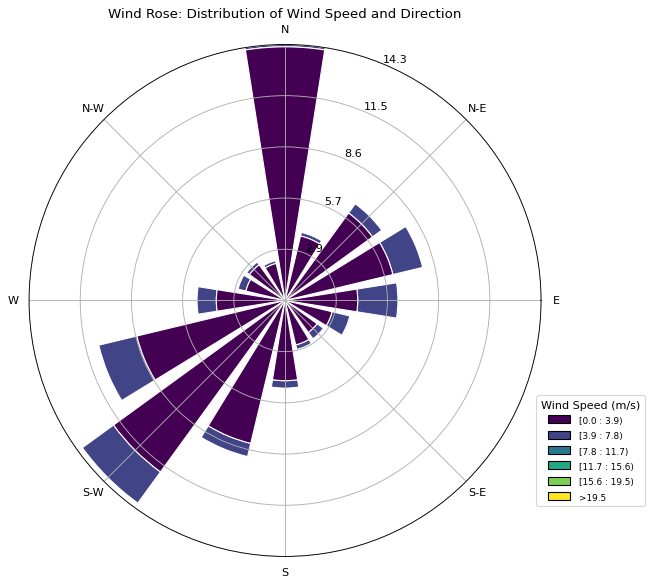

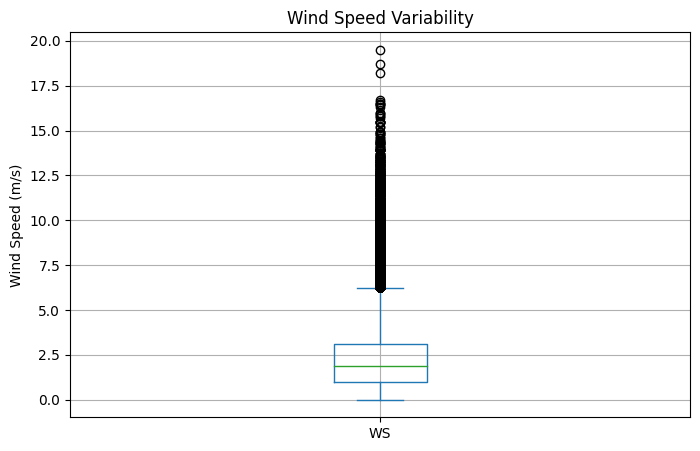

In [8]:
from eda import wind_analysis

# Example: Use the method with the Benin dataset
output_dir = 'plots_wind analysis'  # Directory to save plots
os.makedirs(output_dir, exist_ok=True)

# Perform wind analysis
wind_analysis(benin_df, output_dir=output_dir)


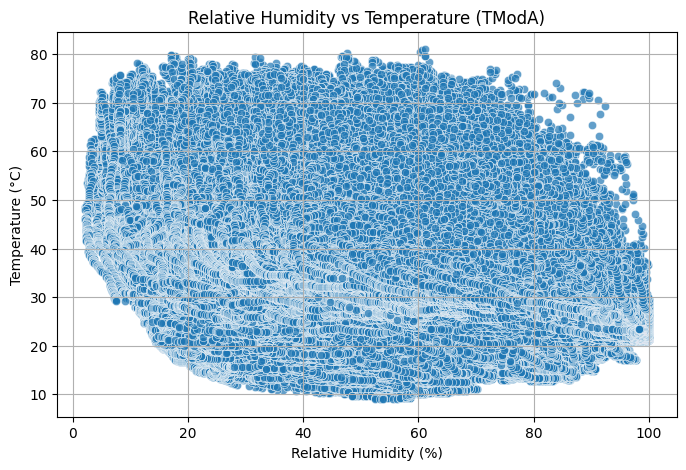

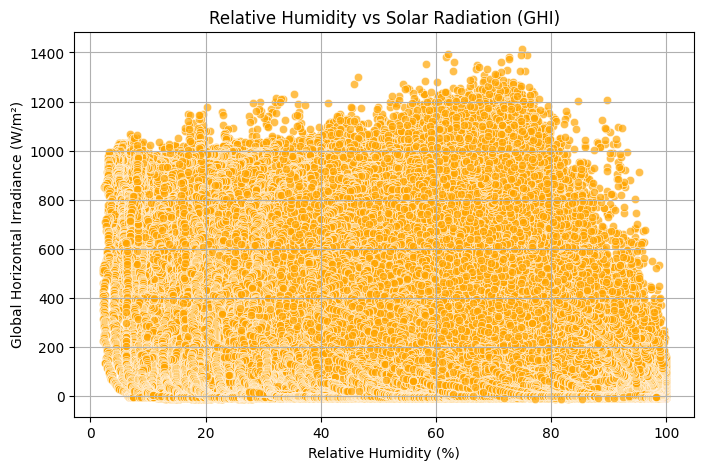

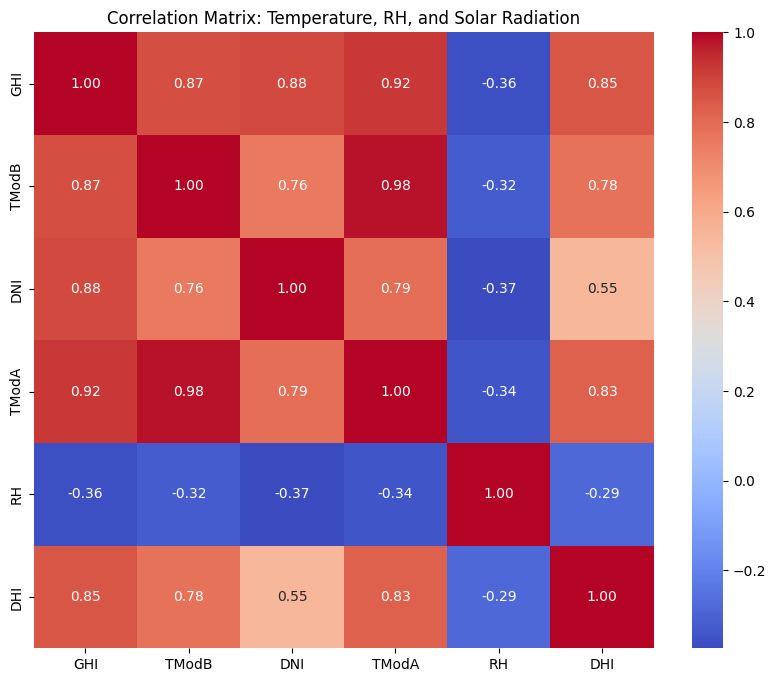

In [9]:
from eda import temperature_analysis
# Example: Use the method with the Benin dataset
output_dir = 'plots_temprature_analysis'
os.makedirs(output_dir, exist_ok=True)

# Perform temperature analysis
temperature_analysis(benin_df, output_dir=output_dir)


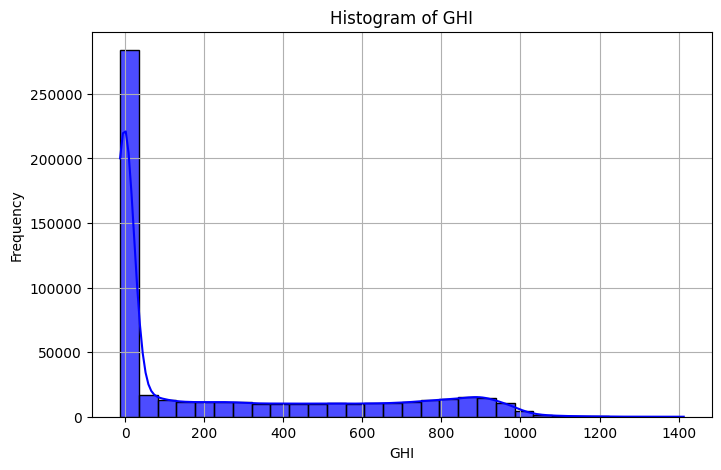

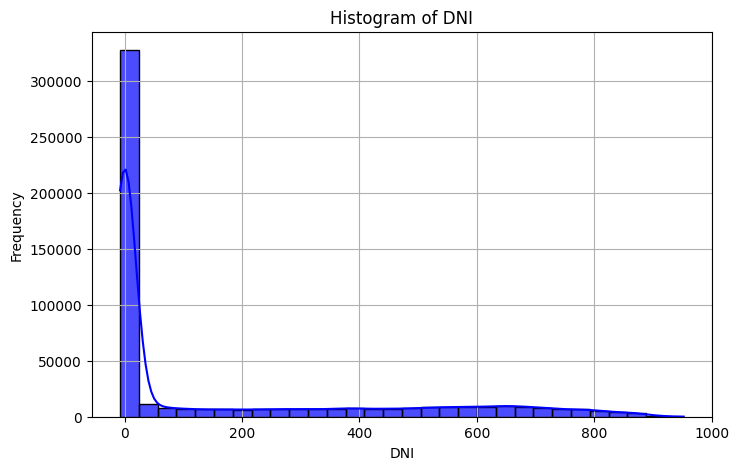

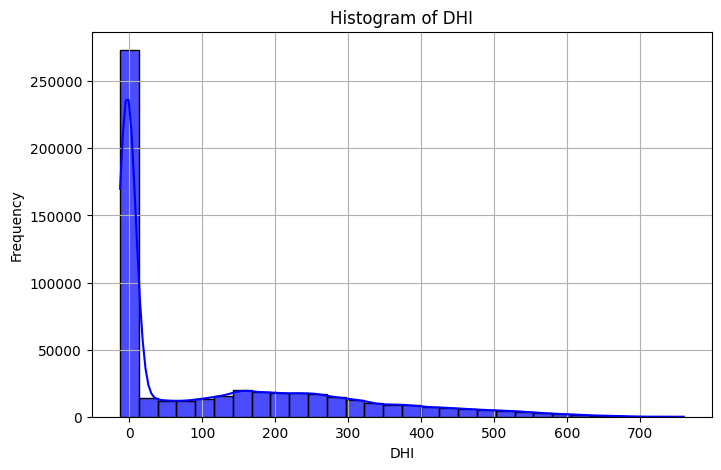

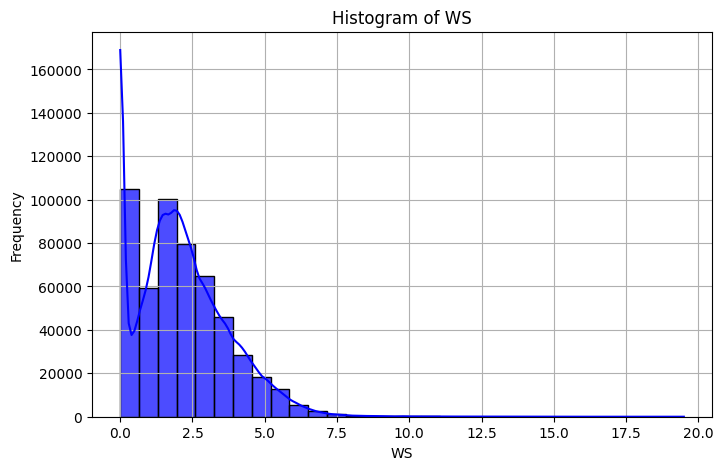

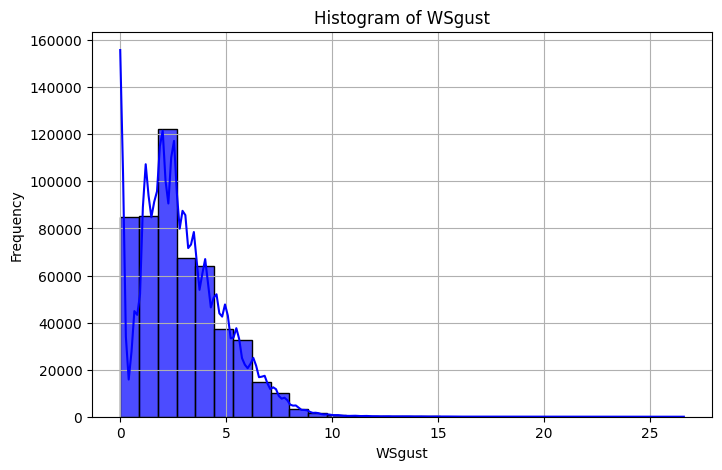

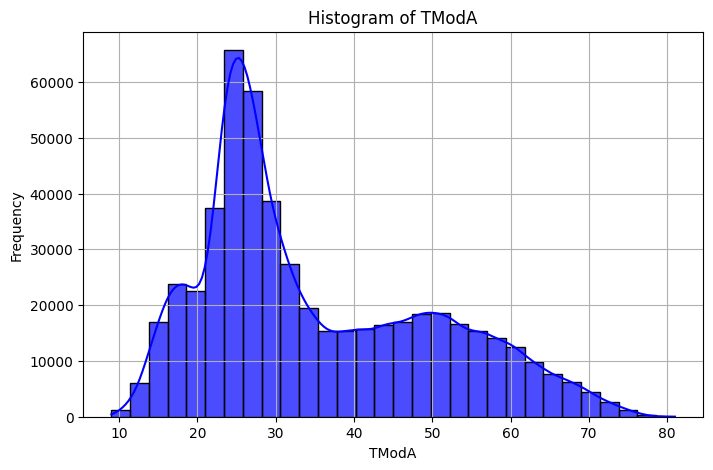

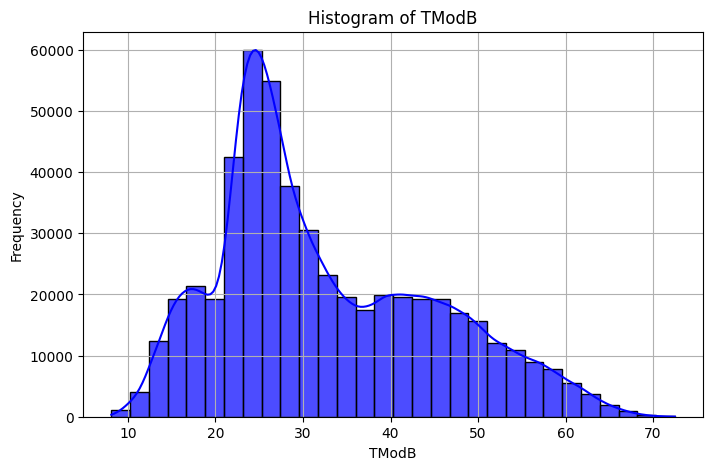

In [10]:
from eda import create_histograms

# Specify the columns to analyze
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'TModA', 'TModB']

# Example: Create histograms for the Benin dataset
output_dir = 'plots_histograms'
os.makedirs(output_dir, exist_ok=True)

# Generate histograms
create_histograms(benin_df, columns_to_plot, output_dir=output_dir)


In [11]:
from eda import z_score_analysis
# Specify the columns to analyze
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'TModA', 'TModB']

# Perform Z-Score analysis on the Benin dataset
outliers = z_score_analysis(benin_df, columns_to_analyze)

# Display outliers for each column
for col, flagged in outliers.items():
    print(f"\nOutliers in {col}:")
    print(flagged)



Outliers in GHI:
                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676    2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
849    2021-08-09 14:10:00  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2   
850    2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
517777 2022-08-03 13:38:00  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7   
520659 2022-08-05 13:40:00  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3   
520696 2022-08-05 14:17:00  1244.0  745.2  530.4  1126.0  1118.0  30.8  64.3   
522074 2022-08-06 13:15:00  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0   
522075 2022-08-06 13:16:00  1289.0  758.1  519.2  1191.0  1179.0  31.4  65.9   

         WS  WSgust  

Plot saved to: plots/bubble_charts/ghi_vs_tamb_vs_ws.png


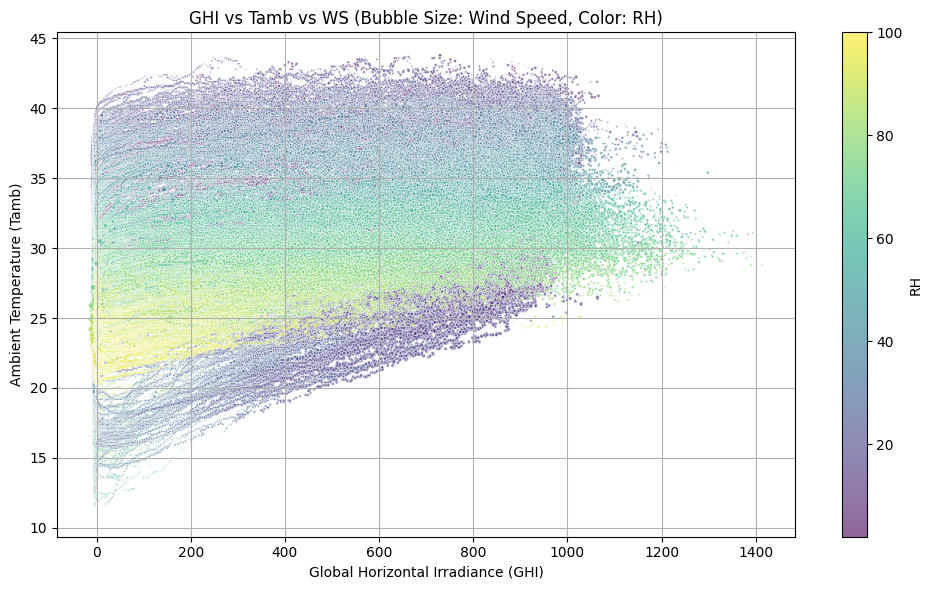

In [12]:
from eda import create_bubble_chart

# Parameters for the bubble chart
x_col = 'GHI'  # Solar radiation on the x-axis
y_col = 'Tamb'  # Ambient temperature on the y-axis
bubble_size_col = 'WS'  # Bubble size based on wind speed
color_col = 'RH'  # Color based on relative humidity

# Directory to save the plot
save_dir = "plots/bubble_charts"
save_filename = "ghi_vs_tamb_vs_ws.png"

# Create and save the bubble chart
create_bubble_chart(
    benin_df, 
    x_col=x_col, 
    y_col=y_col, 
    bubble_size_col=bubble_size_col, 
    color_col=color_col,
    title="GHI vs Tamb vs WS (Bubble Size: Wind Speed, Color: RH)",
    xlabel="Global Horizontal Irradiance (GHI)",
    ylabel="Ambient Temperature (Tamb)",
    save_dir=save_dir,
    save_filename=save_filename
)


In [13]:
# Import the functions from src/eda.py
from eda import check_data_quality, clean_data

# Check initial data quality
initial_quality_report = check_data_quality(benin_df)
print("Initial Quality Report:", initial_quality_report)

# Clean the dataset
cleaned_benin_df = clean_data(benin_df)

# Check data quality after cleaning
final_quality_report = check_data_quality(cleaned_benin_df)
print("Final Quality Report:", final_quality_report)

# Display the cleaned dataset
print("Cleaned Dataset Head:")
print(cleaned_benin_df.head())


Initial Quality Report: {'missing_values': Series([], dtype: int64), 'negative_values': {'GHI': 258847, 'DNI': 275987, 'DHI': 259182}, 'outliers': {'ModA': 98, 'ModB': 240, 'WS': 6717, 'WSgust': 5368}, 'summary': {'total_missing': 0, 'total_negative': 794016, 'total_outliers': 12423}}
Final Quality Report: {'missing_values': Series([], dtype: int64), 'negative_values': {'GHI': 0, 'DNI': 0, 'DHI': 0}, 'outliers': {'ModA': 0, 'ModB': 0, 'WS': 546, 'WSgust': 1175}, 'summary': {'total_missing': 0, 'total_negative': 0, 'total_outliers': 1721}}
Cleaned Dataset Head:
              Timestamp   GHI  DNI   DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
413 2021-08-09 06:54:00  16.7  0.0  16.5  16.1  16.3  24.2  98.8  0.0     0.0   
414 2021-08-09 06:55:00  18.2  0.1  18.0  17.4  17.6  24.2  98.8  0.0     0.0   
415 2021-08-09 06:56:00  19.7  0.3  19.5  18.7  18.9  24.2  98.8  0.0     0.0   
416 2021-08-09 06:57:00  21.1  0.6  20.9  19.9  20.1  24.2  98.9  0.0     0.0   
417 2021-08-09 06:58:00  22.

In [14]:
benin_df.shape

(525600, 19)